## Exploratory Data Analysis


This notebook focusses on the first step of any data science project: exploring the data.
Exploratory Data Analysis or EDA is to get familiar to our data, identifying important columns, perform data manipulation and asking interesting questions from our data using visualization tools.

In [1]:
# Data description:
# The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

# • Restaurant Id: Unique id of every restaurant across various cities of the world

# • Restaurant Name: Name of the restaurant

# • Country Code: Country in which restaurant is located

# • City: City in which restaurant is located

# • Address: Address of the restaurant

# • Locality: Location in the city

# • Locality Verbose: Detailed description of the locality

# • Longitude: Longitude coordinate of the restaurant's location

# • Latitude: Latitude coordinate of the restaurant's location

# • Cuisines: Cuisines offered by the restaurant

# • Average Cost for two: Cost for two people in different currencies 👫

# • Currency: Currency of the country

# • Has Table booking: yes/no

# • Has Online delivery: yes/ no

# • Is delivering: yes/ no

# • Switch to order menu: yes/no

# • Price range: range of price of food

# • Aggregate Rating: Average rating out of 5

# • Rating color: depending upon the average rating color

# • Rating text: text on the basis of rating of rating

# • Votes: Number of ratings casted by people

# There is another dataset which has the country codes in it

Our goal in this notebook is to explore the data provided in Zomato csv and to analyze which restaurants have poor ratings in Zomato and why?

In [2]:
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization

%matplotlib inline                      
import seaborn as sns                               # Importing seaborn for visualization


# Loading the datasets

The csv file has encoding ISO-8859-1. Encoding defines what kind of characters(ASCII or non ASCII or something different) can be stored in a file.

In [3]:
zomato_df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')    # Reading file zomato.csv

Inspecting Data

In [4]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Inspecting Data

In [5]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
country_df =pd.read_excel('Country-Code.xlsx')

In [9]:
zomato_data = pd.merge(zomato_df, country_df, on = 'Country Code')      # Pandas Merge function to join two dataframes
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Data Exploration

Description of the numeric columns of dataset

In [11]:
zomato_data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


*Observation

There are 9551 rows in all columns and there are no missing data in numeric columns.

*Average Cost for two

The Standard Deviation is very high on 'Average Cost for two'. It is for different countries having different currency.
There are 15 countries in this dataset and their currencies are not standardized.
Look at the maximum of average price for two : 800000

In [12]:
zomato_data[zomato_data['Average Cost for two'] == 800000]             # Extract rows which meet a specific condition

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,No,No,No,No,3,4.1,Green,Very Good,1498,Indonesia
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,873,Indonesia


On comparing 800000 Indonesian Rupiah to INR it is 3800INR, which is slightly high end.

In [13]:
#Info of the dataset
zomato_data.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

*Observation

There are no missing values in any columns except in cuisines.
Most of the rows are of datatype object i.e. they are categorica

Missing values Imputation

In [14]:
# Filling the missing values in Cuisines

zomato_data['Cuisines'].fillna("Others", inplace=True)

In [15]:
# Filling any numeric missing values

zomato_data['Aggregate rating'].fillna(zomato_data['Aggregate rating'].mean(), inplace=True)

In [16]:
zomato_data.shape                                    # Number of rows and columns in a dataframe

(9551, 22)

# Correlation plot of numeric columns

In [17]:
correlation = zomato_data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()
correlation

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


<AxesSubplot:>

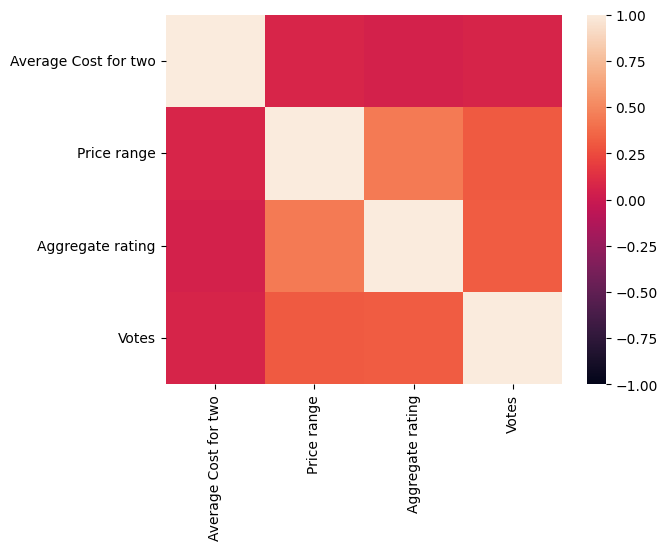

In [18]:
sns.heatmap(correlation, vmin = -1, vmax = 1)   

*Observation

There is some correlation between Price range and Aggregate rating
The rest of the columns have no correlation.

If the Price range is higher, people should rate the restaurant higher.

# Distribution of Aggregate Rating

C:\Users\Rishi\AppData\Local\Temp\ipykernel_5364\3496315793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zomato_data['Aggregate rating']);


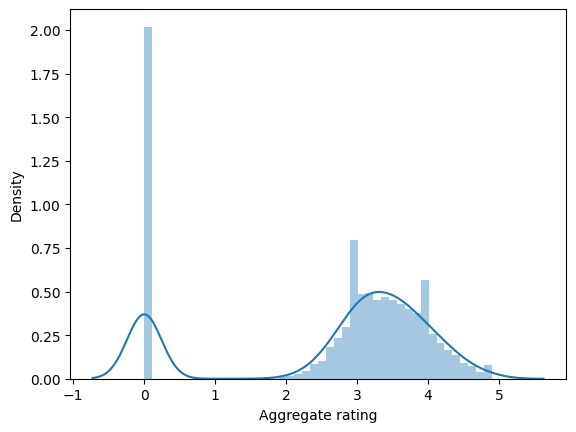

In [19]:
sns.distplot(zomato_data['Aggregate rating']);

*Observation:

A lot of restaurants are rated 0. After this most of the restaurants have been rated between 3 and 4.

# Bivariate Analysis
Here we check the relationship between two variables.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Votes'>

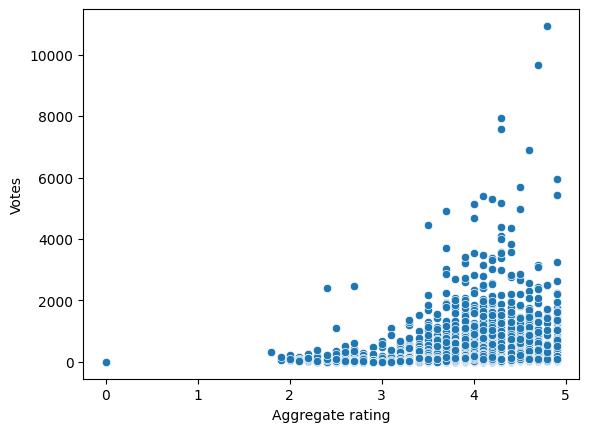

In [20]:
# Relationship between Aggregate Ratings and Votes

sns.scatterplot(x=zomato_data['Aggregate rating'], y= zomato_data['Votes'])

# Observation:
 As the quality of food gets better, the aggregate ratings increases and the number of voters also increase.

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

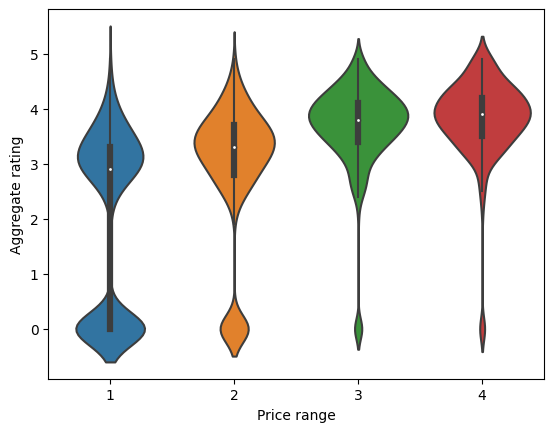

In [22]:
# Relationship between Price range and Aggregate Ratings

sns.violinplot(x='Price range', y='Aggregate rating', data = zomato_data)

 # Observation 1
Here we can clearly see that with increase in Price range, the median of ratings also increase.